## Problem Statement
Banking-Classification

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.


Feraure Explanation

1. Age: The age of the customer.
2. Job: The type of job the customer has.
3. Marital: The marital status of the customer.
4. Education: The level of education of the customer.
5. Default: Whether the customer has defaulted on a loan in the past.
6. Housing: Whether the customer has a housing loan.
7. Loan: Whether the customer has a personal loan.
8. Contact: The method of communication used to contact the customer.
9. Month: The month in which the customer was last contacted.
10. Day_of_week: The day of the week on which the customer was last contacted.
11. Duration: The duration of the last contact with the custome,it was the important fearute because if duration=0 then y=no.
12. Campaign: The number of contacts made during this campaign for this customer.
13. Pdays: The number of days that passed by after the customer was last contacted from a previous campaign.
14. Previous: The number of contacts made before this campaign for this customer.
15. Poutcome: The outcome of the previous marketing campaign.

These features can be used to predict whether the customer will subscribe to a bank term deposit (the target variable 'y'). 


## Psecudo Code

1.  Loading the dataset using pandas.
2.  Checking the data using Head,Shape,Describe,nunique
3.  Checking the Null Values.
4.  Checking Correlation between Features by using Heatmap,if correlation is high between features, drop either one of the feature.
5.  Droping features 
6.  Split the dataset into features (x) and target variable (y)
7.  Checking the Updated Data.
8.  Seperating the Numerical & Categorical columns.
9.  Converting the Numerical & Categorical columns into Data Frames.
10. Converting the Categorical Data into Numerical Data by using LabelEncoder.
11. Concating the converted Categorical data and Numerical data into single  train_data.
12. Scaling the features using MinMaxScaler() from scikit-learn.
13. Split the data into training and testing sets using train_test_split() from scikit-learn.
14. Initialize the KNN classifier with the desired hyperparameters using KNeighborsClassifier() from scikit-learn.
15. Defning the parameter Grid Search
16. Creating the Grid Search CV and fit to train data.
17. Evaluate the best hyper parameter & accuracy of the model using accuracy_score() from scikit-learn on both train and test data.
18. Print the accuracy score.


In [134]:
#import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [135]:
# Load dataset
train_data=pd.read_csv('/content/new_train.csv')
test_data=pd.read_csv('/content/new_test (1).csv')


In [136]:
train_data1=train_data.sample(n=1500)

In [137]:
# To check train data 
train_data1.head()

age          job  marital          education  default housing loan  \
28344   33  blue-collar  married           basic.4y       no     yes  yes   
20598   44   management   single        high.school       no      no   no   
7402    47       admin.  married        high.school  unknown     yes   no   
26654   46  blue-collar  married           basic.9y  unknown      no   no   
17012   37       admin.   single  university.degree       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
28344  telephone   may         wed       220         7    999         0   
20598   cellular   may         mon       233         1    999         0   
7402    cellular   jul         fri       247         4    999         0   
26654  telephone   may         tue       565         2    999         0   
17012   cellular   nov         wed       250         1    999         0   

          poutcome   y  
28344  nonexistent  no  
20598  nonexistent  no  
7402   nonexistent  no  
26654  nonexistent  no  
17012  nonexistent  no

In [138]:
train_data1.y.value_counts()

no     1346
yes     154
Name: y, dtype: int64

In [139]:
# to check train data shape
# shape includes no of records & features 
train_data1.shape

(1500, 16)

In [140]:
test_data1=test_data.sample(n=1500)

In [141]:
#To check test data
test_data1.head()

age  job  marital  education  default  housing  loan  contact  month  \
3793   51    4        1          6        0        0     0        0      6   
8066   52    4        1          6        0        0     0        1      4   
5024   32    9        2          5        0        2     0        0      1   
2689   29    0        1          6        0        2     0        0      3   
8224   41    2        0          2        0        2     2        0      3   

      day_of_week  duration  campaign  poutcome  
3793            0       127         1         1  
8066            2       423         2         1  
5024            3       128         1         1  
2689            2        51         1         1  
8224            2       219         1         1

In [142]:
# to check test data shape
# shape includes no of records & features 
test_data1.shape


(1500, 13)

In [143]:
# Total count,Range,percentiles,standard deviation of each feature 
train_data1.describe()

age     duration     campaign        pdays     previous
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000
mean     39.992000   255.502000     2.610667   971.216000     0.160667
std      10.220318   246.894822     3.073551   163.756221     0.480632
min      18.000000     7.000000     1.000000     1.000000     0.000000
25%      32.000000   101.000000     1.000000   999.000000     0.000000
50%      38.000000   182.000000     2.000000   999.000000     0.000000
75%      47.000000   313.000000     3.000000   999.000000     0.000000
max      85.000000  2453.000000    56.000000   999.000000     6.000000

In [144]:
test_data1.describe()

age          job      marital    education      default  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     40.178000     3.750667     1.150000     3.750667     0.203333   
std       9.255454     3.575615     0.602004     2.100661     0.402613   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      32.000000     0.000000     1.000000     2.000000     0.000000   
50%      39.000000     2.000000     1.000000     3.000000     0.000000   
75%      48.000000     7.000000     2.000000     6.000000     0.000000   
max      55.000000    11.000000     3.000000     7.000000     1.000000   

           housing         loan      contact        month  day_of_week  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      1.078000     0.323333     0.352667     4.248667     2.045333   
std       0.986863     0.722360     0.477959     2.301528     1.379086   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     3.000000     1.000000   
50%       2.000000     0.000000     0.000000     4.000000     2.000000   
75%       2.000000     0.000000     1.000000     6.000000     3.000000   
max       2.000000     2.000000     1.000000     9.000000     4.000000   

         duration     campaign     poutcome  
count  1500.00000  1500.000000  1500.000000  
mean    224.14000     2.234000     0.942667  
std     158.14021     1.410167     0.358885  
min      36.00000     1.000000     0.000000  
25%      99.00000     1.000000     1.000000  
50%     175.50000     2.000000     1.000000  
75%     306.25000     3.000000     1.000000  
max     554.00000     5.000000     2.000000

In [145]:
#no of unique values in each feature 
train_data1.nunique()

age             59
job             12
marital          4
education        7
default          2
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       574
campaign        24
pdays           15
previous         6
poutcome         3
y                2
dtype: int64

In [146]:
test_data1.nunique()

age             30
job             12
marital          4
education        7
default          2
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       417
campaign         5
poutcome         3
dtype: int64

In [147]:
#info regarding class , index , non null values count , Data Types
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 28344 to 1150
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          1500 non-null   int64 
 1   job          1500 non-null   object
 2   marital      1500 non-null   object
 3   education    1500 non-null   object
 4   default      1500 non-null   object
 5   housing      1500 non-null   object
 6   loan         1500 non-null   object
 7   contact      1500 non-null   object
 8   month        1500 non-null   object
 9   day_of_week  1500 non-null   object
 10  duration     1500 non-null   int64 
 11  campaign     1500 non-null   int64 
 12  pdays        1500 non-null   int64 
 13  previous     1500 non-null   int64 
 14  poutcome     1500 non-null   object
 15  y            1500 non-null   object
dtypes: int64(5), object(11)
memory usage: 199.2+ KB


In [148]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 3793 to 3212
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          1500 non-null   int64
 1   job          1500 non-null   int64
 2   marital      1500 non-null   int64
 3   education    1500 non-null   int64
 4   default      1500 non-null   int64
 5   housing      1500 non-null   int64
 6   loan         1500 non-null   int64
 7   contact      1500 non-null   int64
 8   month        1500 non-null   int64
 9   day_of_week  1500 non-null   int64
 10  duration     1500 non-null   int64
 11  campaign     1500 non-null   int64
 12  poutcome     1500 non-null   int64
dtypes: int64(13)
memory usage: 164.1 KB


In [149]:
#Total null values count in data 
train_data1.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [150]:
test_data1.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
dtype: int64

In [151]:
#correlation between features 
#If correlation is high we drop either one of the features
train_data1.corr()

age  duration  campaign     pdays  previous
age       1.000000 -0.020980  0.005677 -0.106602  0.056757
duration -0.020980  1.000000 -0.071517 -0.070379  0.039634
campaign  0.005677 -0.071517  1.000000  0.024444 -0.045688
pdays    -0.106602 -0.070379  0.024444  1.000000 -0.515448
previous  0.056757  0.039634 -0.045688 -0.515448  1.000000

<AxesSubplot:>

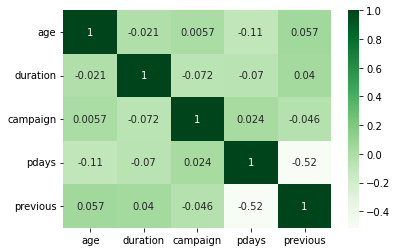

In [152]:
# features correlation with  visualization 
# features correlation indicated in colours & more correlated with white
sns.heatmap(train_data1.corr(),annot=True,cmap='Greens')

In [153]:
test_data1.corr()

age       job   marital  education   default   housing  \
age          1.000000 -0.005713 -0.392360  -0.105181  0.182553  0.044565   
job         -0.005713  1.000000 -0.027242   0.120501 -0.009710  0.012321   
marital     -0.392360 -0.027242  1.000000   0.086039 -0.068122 -0.024199   
education   -0.105181  0.120501  0.086039   1.000000 -0.202679 -0.017965   
default      0.182553 -0.009710 -0.068122  -0.202679  1.000000  0.012106   
housing      0.044565  0.012321 -0.024199  -0.017965  0.012106  1.000000   
loan        -0.053316  0.014703  0.012656  -0.014980 -0.019765  0.060051   
contact      0.066329 -0.019948 -0.091233  -0.061861  0.133250 -0.044215   
month       -0.038094 -0.060393 -0.015383  -0.053261 -0.020045 -0.003552   
day_of_week -0.019552 -0.002982 -0.037927  -0.012215  0.053074 -0.022207   
duration    -0.037684 -0.014754  0.025377  -0.002514  0.027780 -0.015835   
campaign     0.038872  0.017929 -0.060234   0.031194  0.035990  0.017555   
poutcome     0.011108  0.007048 -0.018835   0.012882  0.039183  0.006984   

                 loan   contact     month  day_of_week  duration  campaign  \
age         -0.053316  0.066329 -0.038094    -0.019552 -0.037684  0.038872   
job          0.014703 -0.019948 -0.060393    -0.002982 -0.014754  0.017929   
marital      0.012656 -0.091233 -0.015383    -0.037927  0.025377 -0.060234   
education   -0.014980 -0.061861 -0.053261    -0.012215 -0.002514  0.031194   
default     -0.019765  0.133250 -0.020045     0.053074  0.027780  0.035990   
housing      0.060051 -0.044215 -0.003552    -0.022207 -0.015835  0.017555   
loan         1.000000 -0.003948 -0.021910    -0.017402 -0.008456  0.008848   
contact     -0.003948  1.000000  0.256196    -0.013138 -0.050282  0.069496   
month       -0.021910  0.256196  1.000000     0.042265  0.021177 -0.083716   
day_of_week -0.017402 -0.013138  0.042265     1.000000  0.034891 -0.037703   
duration    -0.008456 -0.050282  0.021177     0.034891  1.000000 -0.078081   
campaign     0.008848  0.069496 -0.083716    -0.037703 -0.078081  1.000000   
poutcome     0.032955  0.090731 -0.055417     0.024125  0.035158  0.005436   

             poutcome  
age          0.011108  
job          0.007048  
marital     -0.018835  
education    0.012882  
default      0.039183  
housing      0.006984  
loan         0.032955  
contact      0.090731  
month       -0.055417  
day_of_week  0.024125  
duration     0.035158  
campaign     0.005436  
poutcome     1.000000

<AxesSubplot:>

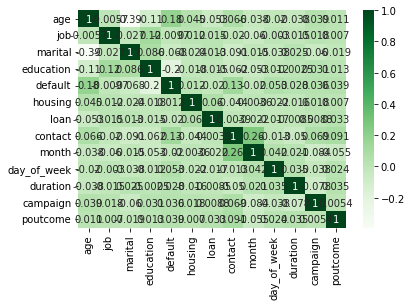

In [154]:
sns.heatmap(test_data1.corr(),annot=True,cmap='Greens')

In [155]:
#Drop features may not required in model prediction 
xtr=train_data1.drop(['pdays','previous','month','day_of_week'],axis=1)
xte=test_data1.drop(['month','day_of_week'],axis=1)
xtr

age          job  marital          education  default  housing  \
28344   33  blue-collar  married           basic.4y       no      yes   
20598   44   management   single        high.school       no       no   
7402    47       admin.  married        high.school  unknown      yes   
26654   46  blue-collar  married           basic.9y  unknown       no   
17012   37       admin.   single  university.degree       no      yes   
...    ...          ...      ...                ...      ...      ...   
3868    36       admin.  married  university.degree       no       no   
12787   50    housemaid  married           basic.9y  unknown  unknown   
6958    38   technician   single  university.degree       no      yes   
5221    49       admin.  married        high.school       no       no   
1150    32       admin.  married  university.degree       no      yes   

          loan    contact  duration  campaign     poutcome   y  
28344      yes  telephone       220         7  nonexistent  no  
20598       no   cellular       233         1  nonexistent  no  
7402        no   cellular       247         4  nonexistent  no  
26654       no  telephone       565         2  nonexistent  no  
17012       no   cellular       250         1  nonexistent  no  
...        ...        ...       ...       ...          ...  ..  
3868        no   cellular       126         2  nonexistent  no  
12787  unknown  telephone        66         7  nonexistent  no  
6958        no   cellular       210         2  nonexistent  no  
5221        no   cellular       151         1  nonexistent  no  
1150        no   cellular       205         2  nonexistent  no  

[1500 rows x 12 columns]

In [156]:
# splitting numerical & categorical columns
num_cols=list(xtr.select_dtypes(exclude='object').columns)
cat_cols=list(xtr.select_dtypes(include='object').columns)

In [157]:
#numerical features 
num_cols

['age', 'duration', 'campaign']

In [158]:
#categorical features 
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'y']

In [159]:
# converting numerical & categorical columns into data frames 
xtr_num=xtr[num_cols]
xtr_cat=xtr[cat_cols]
xtr[cat_cols]=xtr[cat_cols].astype("category")
xtr_cat

job  marital          education  default  housing     loan  \
28344  blue-collar  married           basic.4y       no      yes      yes   
20598   management   single        high.school       no       no       no   
7402        admin.  married        high.school  unknown      yes       no   
26654  blue-collar  married           basic.9y  unknown       no       no   
17012       admin.   single  university.degree       no      yes       no   
...            ...      ...                ...      ...      ...      ...   
3868        admin.  married  university.degree       no       no       no   
12787    housemaid  married           basic.9y  unknown  unknown  unknown   
6958    technician   single  university.degree       no      yes       no   
5221        admin.  married        high.school       no       no       no   
1150        admin.  married  university.degree       no      yes       no   

         contact     poutcome   y  
28344  telephone  nonexistent  no  
20598   cellular  nonexistent  no  
7402    cellular  nonexistent  no  
26654  telephone  nonexistent  no  
17012   cellular  nonexistent  no  
...          ...          ...  ..  
3868    cellular  nonexistent  no  
12787  telephone  nonexistent  no  
6958    cellular  nonexistent  no  
5221    cellular  nonexistent  no  
1150    cellular  nonexistent  no  

[1500 rows x 9 columns]

In [160]:
xtr_cat=pd.DataFrame(xtr_cat)

In [161]:
xtr_cat1=xtr_cat.drop(['y'],axis=1)
target=xtr_cat.drop(xtr_cat1,axis=1)
target.head()

y
28344  no
20598  no
7402   no
26654  no
17012  no

In [162]:
cat_cols1=list(xtr_cat1.select_dtypes(include='object').columns)

In [163]:
# converting numerical & categorical columns into data frames 
xtr_cat1_tr=xtr[cat_cols]
xtr_cat1[cat_cols1]=xtr_cat1[cat_cols1].astype("category")
xtr_cat1

job  marital          education  default  housing     loan  \
28344  blue-collar  married           basic.4y       no      yes      yes   
20598   management   single        high.school       no       no       no   
7402        admin.  married        high.school  unknown      yes       no   
26654  blue-collar  married           basic.9y  unknown       no       no   
17012       admin.   single  university.degree       no      yes       no   
...            ...      ...                ...      ...      ...      ...   
3868        admin.  married  university.degree       no       no       no   
12787    housemaid  married           basic.9y  unknown  unknown  unknown   
6958    technician   single  university.degree       no      yes       no   
5221        admin.  married        high.school       no       no       no   
1150        admin.  married  university.degree       no      yes       no   

         contact     poutcome  
28344  telephone  nonexistent  
20598   cellular  nonexistent  
7402    cellular  nonexistent  
26654  telephone  nonexistent  
17012   cellular  nonexistent  
...          ...          ...  
3868    cellular  nonexistent  
12787  telephone  nonexistent  
6958    cellular  nonexistent  
5221    cellular  nonexistent  
1150    cellular  nonexistent  

[1500 rows x 8 columns]

In [164]:
xtr_num

age  duration  campaign
28344   33       220         7
20598   44       233         1
7402    47       247         4
26654   46       565         2
17012   37       250         1
...    ...       ...       ...
3868    36       126         2
12787   50        66         7
6958    38       210         2
5221    49       151         1
1150    32       205         2

[1500 rows x 3 columns]

In [165]:
#converting the target variable as num by using Labelencoder
from sklearn.preprocessing import  LabelEncoder
encoder=LabelEncoder()
for col in cat_cols1: 
    xtr_cat1[col]=encoder.fit_transform(xtr_cat1[col])

In [166]:
xtr_cat1.head()

job  marital  education  default  housing  loan  contact  poutcome
28344    1        1          0        0        2     2        1         1
20598    4        2          3        0        0     0        0         1
7402     0        1          3        1        2     0        0         1
26654    1        1          2        1        0     0        1         1
17012    0        2          5        0        2     0        0         1

In [167]:
encoder_tg=LabelEncoder() 
target_enc=encoder_tg.fit_transform(target)

In [168]:
xtr_cat1.head()

job  marital  education  default  housing  loan  contact  poutcome
28344    1        1          0        0        2     2        1         1
20598    4        2          3        0        0     0        0         1
7402     0        1          3        1        2     0        0         1
26654    1        1          2        1        0     0        1         1
17012    0        2          5        0        2     0        0         1

In [169]:
xtr_cat1=pd.concat([xtr_cat1,target],axis=1)

In [170]:
#concatination of transformed categorical data & numerical data
train_data1=pd.concat([xtr_cat1,xtr_num],axis=1)

In [171]:
columns=train_data1.columns
columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y', 'age', 'duration', 'campaign'],
      dtype='object')

In [172]:
columns=xte.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [173]:
#concating the target variable to data
x_ov=train_data1.drop(['y'],axis=1)
y_ov=train_data1.drop(x_ov,axis=1)

In [174]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

#Separate majority and minority classes
x_df = train_data1[train_data1['y']==0]
y_df = train_data1[train_data1['y']==1]



In [175]:
print(x_df.shape,y_df.shape)

(0, 12) (0, 12)


In [176]:
smk=SMOTETomek(random_state=42)

In [177]:
x_ov1,y_ov1=smk.fit_resample(x_ov,y_ov)


In [178]:
print(x_ov1.shape,y_ov1.shape)

(2622, 11) (2622, 1)


In [179]:
y_ov1.value_counts()

y  
no     1311
yes    1311
dtype: int64

In [180]:
#normalizing the data between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
train_data1=pd.DataFrame(scale.fit_transform(x_ov1),columns=columns)
test_data1=pd.DataFrame(scale.fit_transform(xte),columns=columns)
train_data1.head()

age       job   marital  education  default  housing  loan  contact  \
0  0.090909  0.333333  0.000000        0.0      1.0      1.0   1.0      0.5   
1  0.363636  0.666667  0.500000        0.0      0.0      0.0   0.0      0.5   
2  0.000000  0.333333  0.500000        1.0      1.0      0.0   0.0      0.5   
3  0.090909  0.333333  0.333333        1.0      0.0      0.0   1.0      0.5   
4  0.000000  0.666667  0.833333        0.0      1.0      0.0   0.0      0.5   

   duration  campaign  poutcome  
0  0.223881  0.087081  0.109091  
1  0.388060  0.092396  0.000000  
2  0.432836  0.098119  0.054545  
3  0.417910  0.228128  0.018182  
4  0.283582  0.099346  0.000000

In [181]:
test_data1.head()

age       job   marital  education  default  housing  loan  contact  \
0  0.862069  0.363636  0.333333   0.857143      0.0      0.0   0.0      0.0   
1  0.896552  0.363636  0.333333   0.857143      0.0      0.0   0.0      1.0   
2  0.206897  0.818182  0.666667   0.714286      0.0      1.0   0.0      0.0   
3  0.103448  0.000000  0.333333   0.857143      0.0      1.0   0.0      0.0   
4  0.517241  0.181818  0.000000   0.285714      0.0      1.0   1.0      0.0   

   duration  campaign  poutcome  
0  0.175676      0.00       0.5  
1  0.747104      0.25       0.5  
2  0.177606      0.00       0.5  
3  0.028958      0.00       0.5  
4  0.353282      0.00       0.5

In [182]:
#split data with test size of 30%
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(train_data1,y_ov1,test_size=0.3,random_state=12345)
print(x_train.shape)
print(y_train.shape)
y_test.shape

(1835, 11)
(1835, 1)


(787, 1)

In [183]:
#import libraries for model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [184]:
# define the parameter grid
param_grid = {'n_neighbors': [7,9]}

In [185]:
knn = KNeighborsClassifier()

In [186]:
#creating grid search cv and and fit to train data 
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 9]})

In [187]:
y_pred = grid_search.predict(x_train)

In [188]:
#best hyper parameter and accuaracy predicted 
print(grid_search.best_params_)
accuracy = accuracy_score(y_train, y_pred)
print('Train accuracy: ',accuracy)

{'n_neighbors': 7}
Train accuracy:  0.8931880108991825


In [189]:
best_knn = grid_search.best_estimator_
y_pred1 = best_knn.predict(x_test)

In [190]:
#accuracy predicted on test data
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred1)
print('Test accuracy: ', test_accuracy)

Test accuracy:  0.8716645489199492


In [191]:
y_pred12 = best_knn.predict(test_data1)

In [192]:
y_pred12

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

In [193]:
t_pred=pd.DataFrame(y_pred12,columns=['y'])

In [194]:
test_data12=pd.concat([test_data1,t_pred],axis=1)
test_data12.head()

age       job   marital  education  default  housing  loan  contact  \
0  0.862069  0.363636  0.333333   0.857143      0.0      0.0   0.0      0.0   
1  0.896552  0.363636  0.333333   0.857143      0.0      0.0   0.0      1.0   
2  0.206897  0.818182  0.666667   0.714286      0.0      1.0   0.0      0.0   
3  0.103448  0.000000  0.333333   0.857143      0.0      1.0   0.0      0.0   
4  0.517241  0.181818  0.000000   0.285714      0.0      1.0   1.0      0.0   

   duration  campaign  poutcome   y  
0  0.175676      0.00       0.5  no  
1  0.747104      0.25       0.5  no  
2  0.177606      0.00       0.5  no  
3  0.028958      0.00       0.5  no  
4  0.353282      0.00       0.5  no

In [195]:
test_data12.y.value_counts()

no     1015
yes     485
Name: y, dtype: int64

This problem is important for banks because it allows them to identify potential customers who are more likely to subscribe to their services, and to target their marketing efforts more effectively.
It also allows them to better manage their resources and optimize their marketing strategies, ultimately leading to increased revenue and profitability.